In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
# import dataset
df=pd.read_csv('dataset\Salary_dataset.csv')

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\WAJEEHA\AppData\Local\Temp\ipykernel_4560\2344374215.py:2: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv('dataset\Salary_dataset.csv')


In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
#summarization of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [8]:
#shape of the data
df.shape

(30, 3)

In [9]:
#checking for null values
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [10]:
#dropping column
df = df.drop('Unnamed: 0', axis=1)


Text(0, 0.5, 'Salary')

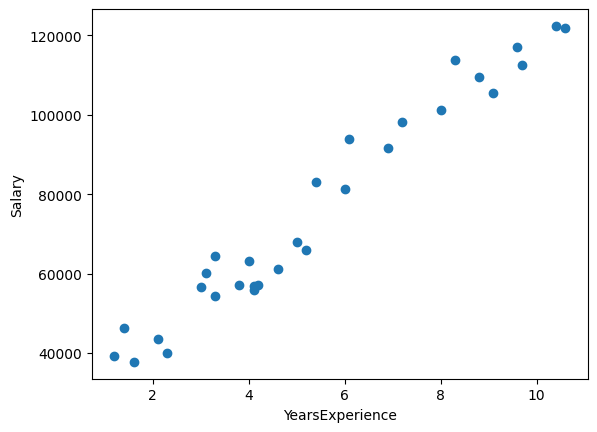

In [11]:
#scatter plot releationship between features
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')


In [12]:
##correlation between features postive or negative
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


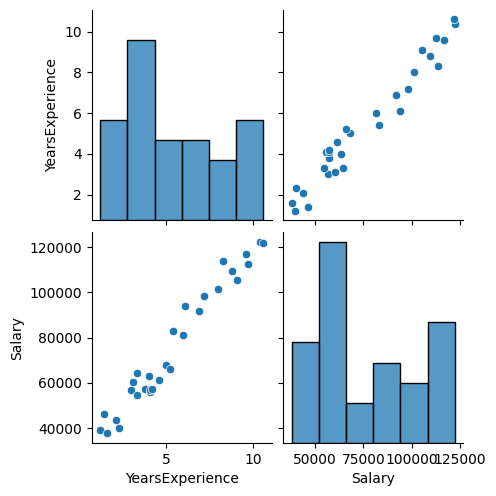

In [13]:
#searborn for visualization
import seaborn as sns
sns.pairplot(df)

In [14]:
##divide our dataset into independent and dependent features
x = df[['YearsExperience']]
y = df['Salary']


In [15]:
##Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [16]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
x_test

array([[ 1.5315002 ],
       [-0.09978613],
       [ 1.04558513],
       [ 0.03904675],
       [-0.68982587],
       [-0.51628477]])

In [18]:
# Training the Model Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [19]:
regression=LinearRegression(n_jobs=-1)

In [20]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [21]:
## coefficient and intercepts
print("Coefficient or slop ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or slop  [27151.53742583]
Intercept :  74208.625


### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)

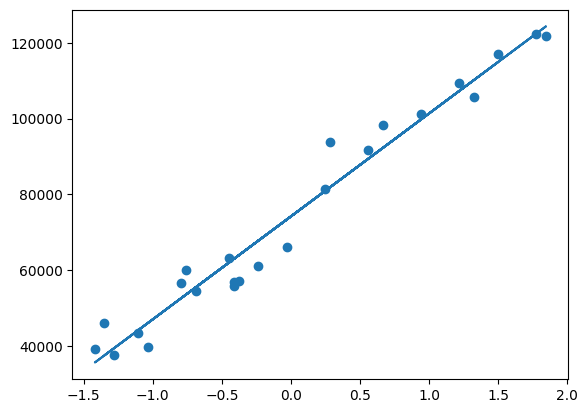

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [23]:
#preiction for test data
y_pred_test=regression.predict(x_test)

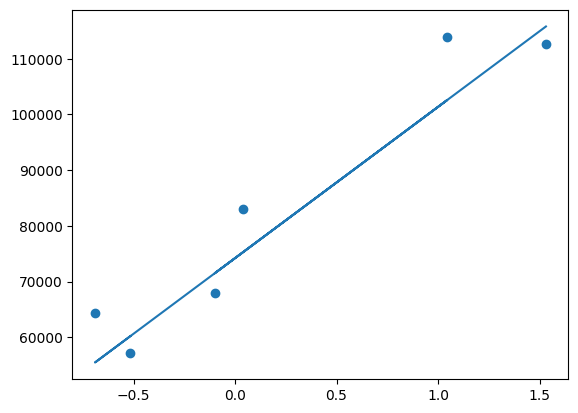

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test))

In [25]:
#Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

49830096.85590836
6286.453830757742
7059.043621901507


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.9024461774180498


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [28]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8780577217725622

## Using OLS

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)

In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              3.064
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                      0.0934
Time:                        20:57:09   Log-Likelihood:                         -303.26
No. Observations:                  24   AIC:                                      608.5
Df Residuals:                      23   BIC:                                      609.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
regression.coef_

array([27151.53742583])